In real-world data is messy and often times has missing values. This is causing problems when it comes to do analysis on data. Before starting any research on a dataset, missing values has to be checked. 

There are many ways to handle mising data. I will demostrate it in a toy dataset which we will create. Specifically, we will answer the following questions in this post.

- What are None and NaN data types? 
- How to detect NULL values?
- How to handle missing values? 

Following packages will be used in this tutorial. 

In [1]:
import warnings 
warnings.filterwarnings('ignore')

# Import libraries and check the versions
import pandas as pd
import sys
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas_profiling
%matplotlib inline


print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__ )
print('Missingno version ' + msno.__version__)

Python version 3.6.1 |Anaconda custom (x86_64)| (default, Mar 22 2017, 19:25:17) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
Numpy version 1.12.1
Pandas version 0.19.2
Matplotlib version 2.0.0
Missingno version 0.3.5


In [2]:
# !pip install import pandas_profiling
# !pip install missingno

Create a toy dataset has some missing values.

In [3]:
data = {'name': ['Michael', 'Jessica', 'Sue', 'Jake', 'Amy', 'Tye'],
        'gender':[None,'F',np.NaN,'F',np.NaN, 'M'],
        'height': [123, 145, 100 , np.NaN, None, 150],
        'weight': [10, np.NaN , 30, np.NaN, None, 20],
        'age': [14, None, 29 , np.NaN, 52, 45],
        }
df = pd.DataFrame(data, columns = ['name','gender', 'height', 'weight', 'age'])
df

,name,gender,height,weight,age
0,Michael,None,123.0,10.0,14.0
1,Jessica,F,145.0,NaN,NaN
2,Sue,NaN,100.0,30.0,29.0
3,Jake,F,NaN,NaN,NaN
4,Amy,NaN,NaN,NaN,52.0
5,Tye,M,150.0,20.0,45.0


### What are None and NaN data types? 

Difference between *None* and *NaN(Not a Number)* is that *None* is the Pythonic way of representing missing values and *NaN* is recognized by all other systems. 

The nice thing is that Pandas has built to handle both of these data types. On the other hand, NumPy has special built-in functions to handle missing data. 

In [4]:
a = np.array([1,2,np.nan, 4])
a.dtype

dtype('float64')

In [5]:
np.sum(a)

nan

In [6]:
np.nansum(a)

7.0

### How to detect NULL values in Pandas?

I will show three ways that I find useful to identify missing values in a dataset.

1- .info(), isnull() and notnull() are useful to detect missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
name      6 non-null object
gender    3 non-null object
height    4 non-null float64
weight    3 non-null float64
age       4 non-null float64
dtypes: float64(3), object(2)
memory usage: 320.0+ bytes


In [8]:
# sum of the missing values in each column
df.isnull().sum()

name      0
gender    3
height    2
weight    3
age       2
dtype: int64

In [9]:
# notnull() is opppsite of isnull()
df.notnull().sum()

name      6
gender    3
height    4
weight    3
age       4
dtype: int64

2- [Missingno][1] is a great package to qucikly display missing values in a dataset. More examples and features can be found in its [github repo][1].

[1]:https://github.com/ResidentMario/missingno

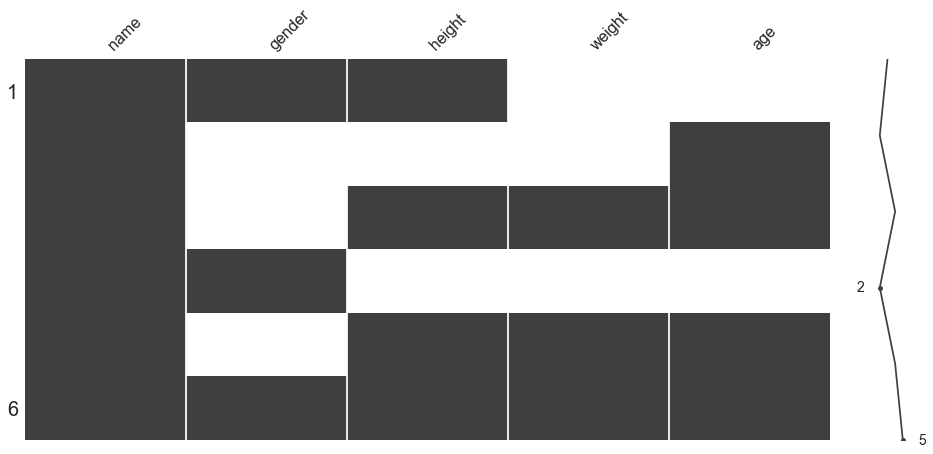

In [10]:
msno.matrix(df.sample(6),
           figsize=(16,7),
           width_ratios=(15,1))

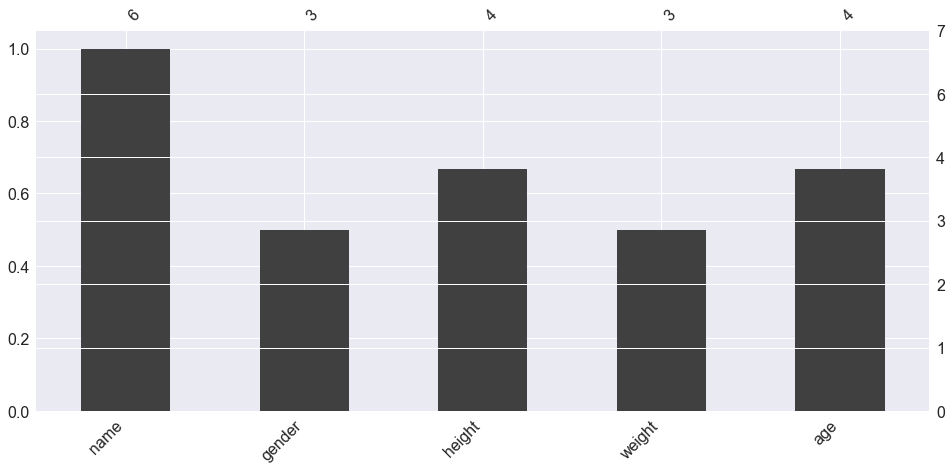

In [11]:
msno.bar(df.sample(6),
           figsize=(16,7))

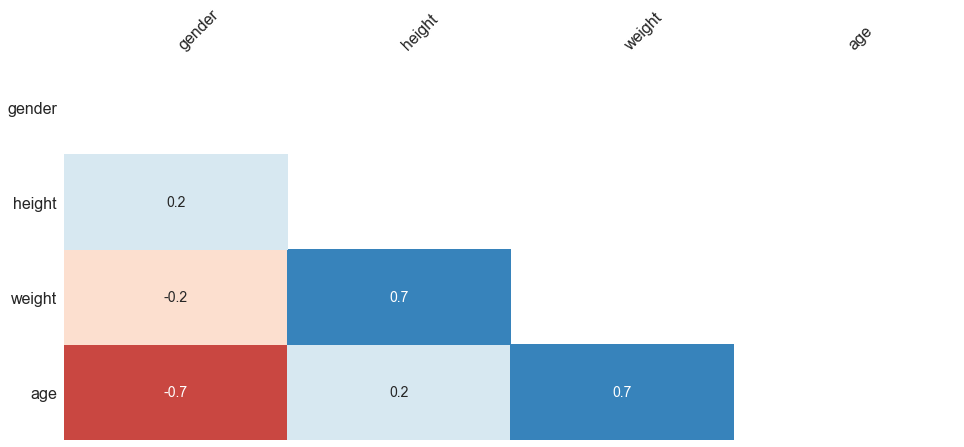

In [12]:
msno.heatmap(df.sample(5),
           figsize=(16,7))

3- Pandas profiling a high level overview of the dataset. It gives many information about dataset as well as each column of the dataset.

In [13]:
pandas_profiling.ProfileReport(df)

Number of variables,5
Number of observations,6
Total Missing (%),33.3%
Total size in memory,320.0 B
Average record size in memory,53.3 B
Numeric,3
Categorical,1
Date,0
Text (Unique),1
Rejected,0
Distinct count,5


### How to handle missing values? 

First way is to get rid of the rows that have missing values. *dropna()* is for that. Pandas does not allow a single cell deletion. Either all row or all cell has to be removed. 

In [14]:
# drops the all rows have missing values, note that inplace is False by defult which means
# original dataset has not changed
df.dropna()

,name,gender,height,weight,age
5,Tye,M,150.0,20.0,45.0


In [15]:
# parameter axis=1 deleted the columns 
df.dropna(axis = 1)

,name
0,Michael
1,Jessica
2,Sue
3,Jake
4,Amy
5,Tye


Sometimes, There is dataset is not big and Instead of deleting you might want to keep the rows/columns that has missing data. In that case, use *fillna()*.

In [16]:
# fills all the missing values with the spcified value, inplace is False.
df['age'].fillna(0)

0    14.0
1     0.0
2    29.0
3     0.0
4    52.0
5    45.0
Name: age, dtype: float64

*ffill* means forward-fill. Here we filled the index row 2 with the previous value which F. On the other hand, first row has no previous row to copy data from. it remained None. To overcome this there is *bfill* parameter stands for back-fill works opposite way of *ffill*

In [17]:
df['gender'].fillna(method='ffill')

0    None
1       F
2       F
3       F
4       F
5       M
Name: gender, dtype: object

In [18]:
df['gender'].fillna(method='bfill', inplace=True)

fill missing height values with each gender's mean value

In [19]:
df['height'].fillna(df.groupby('gender')['height'].transform('mean'), inplace=True)

This time, we will fill the weight column with the mean of all values that columns

In [20]:
df['weight'].fillna(df['weight'].mean(), inplace=True)

In [21]:
df.values

array([['Michael', 'F', 123.0, 10.0, 14.0],
       ['Jessica', 'F', 145.0, 20.0, nan],
       ['Sue', 'F', 100.0, 30.0, 29.0],
       ['Jake', 'F', 122.66666666666667, 20.0, nan],
       ['Amy', 'M', 150.0, 20.0, 52.0],
       ['Tye', 'M', 150.0, 20.0, 45.0]], dtype=object)

In [22]:
df

,name,gender,height,weight,age
0,Michael,F,123.000000,10.0,14.0
1,Jessica,F,145.000000,20.0,NaN
2,Sue,F,100.000000,30.0,29.0
3,Jake,F,122.666667,20.0,NaN
4,Amy,M,150.000000,20.0,52.0
5,Tye,M,150.000000,20.0,45.0
